In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
randomstate=2000985

In [2]:
import re as re

In [3]:
def BoxAndBar(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [4]:
from scipy import stats
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

# IMPORTING THE CSV FILE FROM LAB 1

In [5]:
#Here I am importing the csv file i exported from lab 1!
file=r"C:\Users\Tonie\Downloads\laptop-clean.csv" 
full_data=pd.read_csv(file, delimiter=",") 
your_data_clean=full_data #this is my dataset

In [6]:
your_data_clean.head()

,ID,Company,Product,Product_Model,Product_Series,TypeName,Inches,ScreenResolution,Cpu,Cpu_Brand,...,Memory,Memory_1,Memory_2,Gpu,Gpu_model,Gpu_Series,OpSys,Weight (Kg),Price_euros,Weight_binned
0,6,Acer,Aspire 3,Aspire,3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,AMD,...,500GB HDD,500GB,NaN,AMD Radeon R5,AMD,R5,Windows 10,2.1,400.0,1
1,9,Asus,ZenBook UX430UN,ZenBook,UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,Intel,...,512GB SSD,512GB,NaN,Nvidia GeForce MX150,Nvidia,MX150,Windows 10,1.3,1495.0,0
2,10,Acer,Swift 3,Swift,3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,Intel,...,256GB SSD,256GB,NaN,Intel UHD Graphics 620,Intel,620,Windows 10,1.6,770.0,0
3,14,Dell,Inspiron 3567,Inspiron,3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,Intel,...,256GB SSD,256GB,NaN,AMD Radeon R5 M430,AMD,R5,Windows 10,2.2,498.9,1
4,17,Dell,Inspiron 3567,Inspiron,3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,Intel,...,256GB SSD,256GB,NaN,AMD Radeon R5 M430,AMD,R5,Windows 10,2.2,745.0,1


## DATA TRANSFORMATION

#### 1. ScreenResolution

In [7]:
#Here I am going to transform the ScreenResolution column!
your_data_clean['Resolution'] = your_data_clean['ScreenResolution'].str.extract(r'(\d+x\d+)')
your_data_clean['Screentype'] = your_data_clean['ScreenResolution'].replace(r'(\d+x\d+)','',regex=True)
your_data_clean['Screentype'] = your_data_clean['Screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [8]:
#Creating a new column called Touchscreen so we can check for the presence of a Touchscreen.
your_data_clean['Touchscreen'] = your_data_clean['ScreenResolution'].str.extract(r'(Touchscreen)')
#Replacing "touchscreen" values with nothing in ScreenType
your_data_clean['Screentype'] = your_data_clean['Screentype'].replace(r'(Touchscreen)','',regex=True)

In [9]:
#Here I replace 1=HAve touchscreen, 0=No Touchscreen
your_data_clean['Touchscreen'] = your_data_clean['Touchscreen'].replace('Touchscreen',1)
your_data_clean['Touchscreen'] = your_data_clean['Touchscreen'].replace(np.nan,0)

In [10]:
your_data_clean['Screentype']=your_data_clean['Screentype'].replace(r' ','',regex=True)
#Replacing the blank values with NaN!
your_data_clean['Screentype'] = your_data_clean['Screentype'].replace(r'^\s*$', np.nan, regex=True)
your_data_clean['Screentype'].value_counts()

IPSPanel                 318
IPSPanelRetinaDisplay      1
Name: Screentype, dtype: int64

In [11]:
your_data_clean['Resolution'].value_counts()

1920x1080    737
1366x768     224
3840x2160     41
3200x1800     25
2560x1440     21
1600x900      20
2256x1504      6
1920x1200      3
2160x1440      2
2736x1824      1
Name: Resolution, dtype: int64

In [12]:
your_data_clean['Touchscreen'].value_counts()

0.0    902
1.0    178
Name: Touchscreen, dtype: int64

In [13]:
#Here I drop ScreenResolution because I have already split it into three: Screentype, Touchscreen, and Resolution
your_data_clean = your_data_clean.drop('ScreenResolution', axis=1)

#### 2. Memory 1 and Memory 2

In [14]:
your_data_clean['Memory1']=your_data_clean['Memory']
your_data_clean['Memory1']=your_data_clean['Memory1'].str.replace('1.0TB','1TB', regex=True)
your_data_clean['Memory1']=your_data_clean['Memory1'].str.replace('1TB','1000GB')
your_data_clean['Memory1']=your_data_clean['Memory1'].str.replace('2TB','2000GB')
your_data_clean['Memory1']=your_data_clean['Memory1'].str.replace('GB','')
your_data_clean['Memory1'].value_counts()

256 SSD                         353
1000 HDD                        167
512 SSD                         104
500 HDD                         102
128 SSD +  1000 HDD              89
256 SSD +  1000 HDD              72
128 SSD                          64
32 Flash Storage                 28
512 SSD +  1000 HDD              14
1000 SSD                         14
2000 HDD                         12
64 Flash Storage                 10
256 SSD +  2000 HDD               9
1000 Hybrid                       7
32 SSD                            5
180 SSD                           4
512 SSD +  2000 HDD               3
256 SSD +  256 SSD                2
256 Flash Storage                 2
128 Flash Storage                 2
128 SSD +  2000 HDD               2
256 SSD +  500 HDD                2
1000 SSD +  1000 HDD              2
8 SSD                             1
256 SSD +  1000 Hybrid            1
1000 HDD +  1000 HDD              1
512 SSD +  256 SSD                1
32 HDD                      

In [15]:
#Taking away the space so I can separate them into two drives.
your_data_clean['Memory2']=your_data_clean['Memory1'].str.replace(r' ','')

In [16]:
#Here I imported ReGex which helps me find the string I want to append! I am separating Memory2 into two lists!
Memory1=[]
Memory2=[]
for i in your_data_clean['Memory2']:
    if len(re.findall(r'\+',i))==1: # It has 2 types of memory.
        find=re.findall(r'(\w+)',i)
        Memory1.append(find[0])
        Memory2.append(find[1])
    else: # Only has one memory.
        find=re.findall(r'(\w+)',i)
        Memory1.append(find[0])
        Memory2.append('NaN')

In [17]:
#Here I am further creating two more lists to note the TYPE of the memory for Memory1 and the size!
Memory1_GB=[]
Memory1_Type=[]
for i in Memory1:
    Memory1_Type.append(re.findall(r'(\D\w+)',i)[0])
    Memory1_GB.append(re.findall(r'(\d+)',i)[0])

In [18]:
#Doing the same as above for Memory2!
Memory2_GB=[]
Memory2_Type=[]
for i in Memory2:
    if i != 'NaN':
        Memory2_Type.append(re.findall(r'(\D\w+)',i)[0])
        Memory2_GB.append(re.findall(r'(\d+)',i)[0])
    else:
        Memory2_Type.append('NaN')
        Memory2_GB.append(0)

In [19]:
#Here I am turning the lists into columns!
your_data_clean['Memory1_GB'] = Memory1_GB
your_data_clean['Memory1_Type'] = Memory1_Type
your_data_clean['Memory2_GB'] = Memory2_GB
your_data_clean['Memory2_Type'] = Memory2_Type
#Then I will convert the size columns into floats.
your_data_clean['Memory1_GB'] = your_data_clean['Memory1_GB'].astype(float)
your_data_clean['Memory2_GB'] = your_data_clean['Memory2_GB'].astype(float)

In [20]:
your_data_clean['Memory2_GB'].value_counts()

0.0       879
1000.0    181
2000.0     14
256.0       3
500.0       2
512.0       1
Name: Memory2_GB, dtype: int64

In [21]:
your_data_clean['Memory1_GB'].value_counts()

256.0     441
1000.0    191
128.0     158
512.0     124
500.0     102
32.0       34
64.0       12
2000.0     12
180.0       4
8.0         1
240.0       1
Name: Memory1_GB, dtype: int64

In [22]:
your_data_clean['Memory2_Type'].value_counts()

NaN       879
HDD       195
SSD         4
Hybrid      2
Name: Memory2_Type, dtype: int64

In [23]:
your_data_clean['Memory1_Type'].value_counts()

SSD             746
HDD             284
FlashStorage     43
Hybrid            7
Name: Memory1_Type, dtype: int64

In [24]:
#Here I will be deleting the other Memory tables. I have decided to do the above because the original Memory tables were
#not properly separated! Refences is: Medium website.
your_data_clean=your_data_clean.drop(['Memory1','Memory2','Memory', 'Memory_1', 'Memory_2'], axis=1)

In [25]:
your_data_clean = your_data_clean.replace({'NaN': np.nan})

In [26]:
your_data_clean.head()

,ID,Company,Product,Product_Model,Product_Series,TypeName,Inches,Cpu,Cpu_Brand,Cpu_Model,...,Weight (Kg),Price_euros,Weight_binned,Resolution,Screentype,Touchscreen,Memory1_GB,Memory1_Type,Memory2_GB,Memory2_Type
0,6,Acer,Aspire 3,Aspire,3,Notebook,15.6,AMD A9-Series 9420 3GHz,AMD,A9-Series,...,2.1,400.0,1,1366x768,NaN,0.0,500.0,HDD,0.0,NaN
1,9,Asus,ZenBook UX430UN,ZenBook,UX430UN,Ultrabook,14.0,Intel Core i7 8550U 1.8GHz,Intel,i7,...,1.3,1495.0,0,1920x1080,NaN,0.0,512.0,SSD,0.0,NaN
2,10,Acer,Swift 3,Swift,3,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,Intel,i5,...,1.6,770.0,0,1920x1080,IPSPanel,0.0,256.0,SSD,0.0,NaN
3,14,Dell,Inspiron 3567,Inspiron,3567,Notebook,15.6,Intel Core i3 6006U 2GHz,Intel,i3,...,2.2,498.9,1,1920x1080,NaN,0.0,256.0,SSD,0.0,NaN
4,17,Dell,Inspiron 3567,Inspiron,3567,Notebook,15.6,Intel Core i7 7500U 2.7GHz,Intel,i7,...,2.2,745.0,1,1920x1080,NaN,0.0,256.0,SSD,0.0,NaN


#### Data Transformation is done. I will now be removing other tables that I will not be using in the model :)

In [27]:
#Most of these columns have high cardinalities which would not be ideal for our model.
your_data_clean=your_data_clean.drop(['Product_Series','Product_Model','ID', 'Weight_binned', 'Gpu_Series', 'Cpu_Model',
                                      ], axis=1)

In [28]:
your_data_clean.dtypes

Company            object
Product            object
TypeName           object
Inches            float64
Cpu                object
Cpu_Brand          object
Cpu_Speed(GHz)    float64
Ram (GB)            int64
Gpu                object
Gpu_model          object
OpSys              object
Weight (Kg)       float64
Price_euros       float64
Resolution         object
Screentype         object
Touchscreen       float64
Memory1_GB        float64
Memory1_Type       object
Memory2_GB        float64
Memory2_Type       object
dtype: object

## DATA MODELLING - Preparation

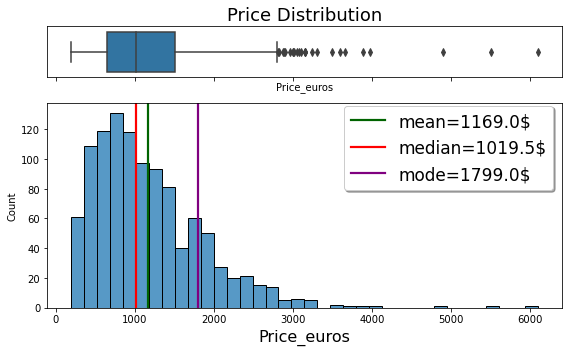

In [29]:
#I am using a custom made plot that makes it easier to see the distribution! I found this on Medium.
BoxAndBar(your_data_clean, 'Price_euros', 'Price Distribution','$')

In [30]:
#Because the graph is skewed towards the left, I will be log transforming it to balance it out!
your_data_clean['Price_euros']=np.log(your_data_clean['Price_euros'])

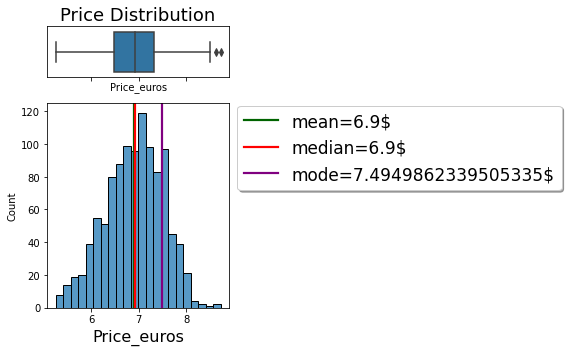

In [31]:
#As you can see now, it is more balanced!
BoxAndBar(your_data_clean, 'Price_euros', 'Price Distribution','$')

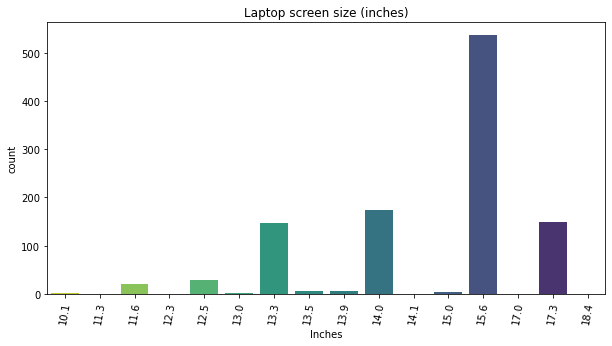

In [32]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Inches', data=your_data_clean, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
plt.title('Laptop screen size (inches)')
plt.show()

In [33]:
#From the graph above, we can see that these 6 values have the greater number of laptops.
#I will only be keeping these 6 bars as they are the "normal"/"more common" sizes!
InchesList = your_data_clean['Inches'].value_counts().index[:6].tolist()
your_data_clean = your_data_clean[your_data_clean['Inches'].isin(InchesList)]

In [34]:
your_data_clean['Inches'].value_counts()

15.6    536
14.0    173
17.3    149
13.3    148
12.5     29
11.6     20
Name: Inches, dtype: int64

In [35]:
#Removing outlier for Ram because it only has 1 row with more than 60 GB.
your_data_clean = your_data_clean[your_data_clean['Ram (GB)']<60]

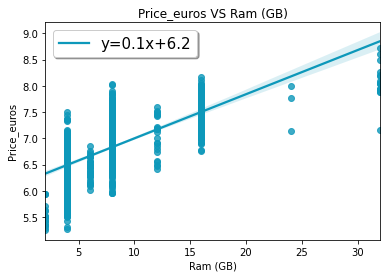

In [36]:
slope, intercept = lr_plot(your_data_clean,'Ram (GB)','Price_euros', 'upper left')

In [37]:
your_data_clean=your_data_clean.fillna('NaN')

## LABEL ENCODING

In [38]:
CateCols =  ['Company','Product','TypeName','Cpu','Gpu','OpSys','Resolution','Screentype','Memory1_Type','Memory2_Type','Gpu_model','Cpu_Brand']

In [39]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(your_data_clean, columns=CateCols, drop_first=True).shape)

Dataframe encoded by OHE dimension :  (1054, 758)


In [40]:
#Label encoding
en = LabelEncoder()
for cols in CateCols:
    your_data_clean[cols] = en.fit_transform(your_data_clean[cols])
print('Dataframe encoded by Label encoding dimension : ', your_data_clean.shape)

Dataframe encoded by Label encoding dimension :  (1054, 20)


In [41]:
your_data_clean.head()

,Company,Product,TypeName,Inches,Cpu,Cpu_Brand,Cpu_Speed(GHz),Ram (GB),Gpu,Gpu_model,OpSys,Weight (Kg),Price_euros,Resolution,Screentype,Touchscreen,Memory1_GB,Memory1_Type,Memory2_GB,Memory2_Type
0,0,53,3,15.6,13,0,3.0,4,11,0,0,2.1,5.991465,0,1,0.0,500.0,1,0.0,2
1,1,527,4,14.0,81,1,1.8,16,82,2,0,1.3,7.309881,2,1,0.0,512.0,3,0.0,2
2,0,379,4,14.0,63,1,1.6,8,48,1,0,1.6,6.646391,2,0,0.0,256.0,3,0.0,2
3,3,205,3,15.6,44,1,2.0,4,17,0,0,2.2,6.212406,2,1,0.0,256.0,3,0.0,2
4,3,205,3,15.6,72,1,2.7,8,17,0,0,2.2,6.613384,2,1,0.0,256.0,3,0.0,2


In [42]:
X=your_data_clean.drop('Price_euros', axis = 1)

In [43]:
y=your_data_clean['Price_euros']

In [44]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = randomstate , shuffle=True)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=randomstate)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((843, 19), (211, 19), (843,), (211,))

In [46]:
#rf = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=15)

In [47]:
#rf.fit(X_train,y_train)

In [48]:
#y_pred_rf = rf.predict(X_test)

In [49]:
#mse_rf = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
#print("RMSE using RF: {} $ ".format(np.round(np.sqrt(mse_rf)),4))

In [50]:
#print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf),4)*100))

In [51]:
y_train

426    6.459904
710    7.494986
726    7.207119
841    7.207119
92     6.111467
         ...   
989    6.538140
525    7.506592
107    6.400257
141    6.700731
654    7.972121
Name: Price_euros, Length: 843, dtype: float64

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=randomstate, n_estimators=100, max_depth=100, max_features=15 )
rfr_model=rfr.fit(X_train, y_train)
print(rfr_model.score(X_train,y_train))
print(rfr_model.score(X_test,y_test))

0.9877975461585301
0.906701106550375


In [53]:
y_out_train_rfr = rfr_model.predict(X_train)

In [54]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_train, y_out_train_rfr))
print(explained_variance_score(y_train, y_out_train_rfr))
print(r2_score(y_train, y_out_train_rfr)) #r2_score os same output as dtr_model
print(mean_squared_error(y_train, y_out_train_rfr, squared = False))
print(mean_absolute_error(y_train, y_out_train_rfr))

0.0044868550597025325
0.9877977897542327
0.9877975461585301
0.06698399107027389
0.04957827714526678


In [55]:
y_out_model_rfr = rfr_model.predict(X_test)

In [56]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
print(mean_squared_error(y_test, y_out_model_rfr))
print(explained_variance_score(y_test, y_out_model_rfr))
print(r2_score(y_test, y_out_model_rfr)) #r2_score os same output as dtr_model
print(mean_squared_error(y_test, y_out_model_rfr, squared = False))

0.030798325628952437
0.9067117477035539
0.906701106550375
0.1754945173757643


In [57]:
count_row = your_data_clean.shape[0]
count_row

1054

In [58]:
your_data_clean['Cpu']

0       13
1       81
2       63
3       44
4       72
        ..
1075    65
1076    65
1077    31
1078    65
1079    31
Name: Cpu, Length: 1054, dtype: int32

In [59]:
feature_name_list=your_data_clean.drop('Price_euros', axis = 1).columns

In [60]:
rfr.feature_names = feature_name_list

Text(0.5, 0, 'Feature Importance (%)')

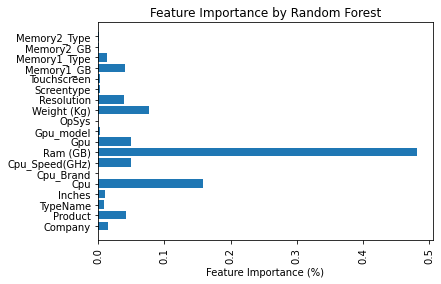

In [61]:
plt.barh(rfr.feature_names,rfr.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)')

Text(0.5, 1.0, 'Results')

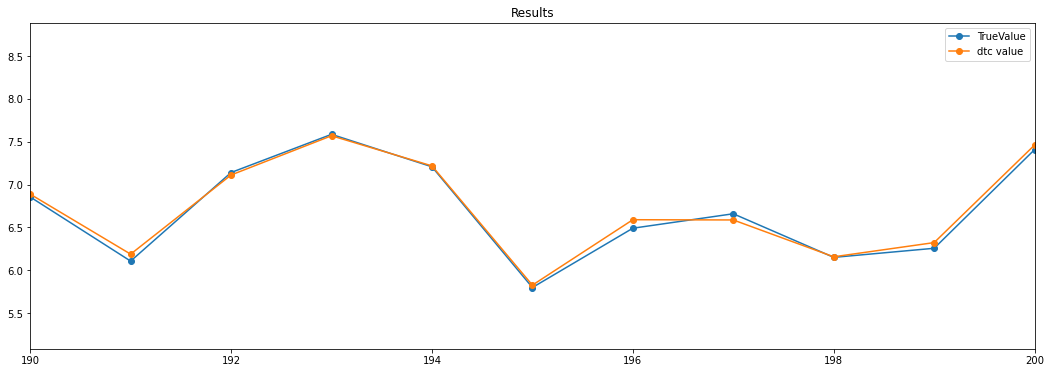

In [65]:
plt.figure(figsize=(18,6))
plt.plot(y_train.reset_index(drop=True), '-o', label = 'TrueValue')
plt.plot(y_out_train_rfr + 0.03, '-o', label = 'dtc value')
plt.xlim(190,200)
plt.legend()
plt.title('Results')

Text(0.5, 1.0, 'Results')

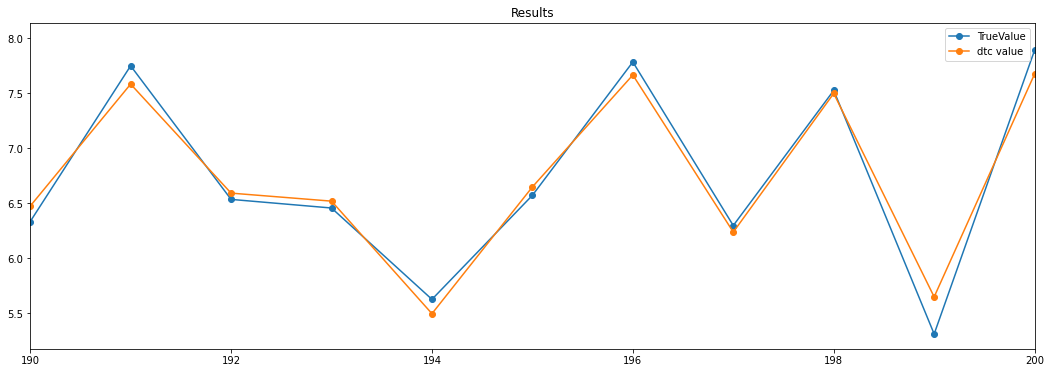

In [66]:
plt.figure(figsize=(18,6))
plt.plot(y_test.reset_index(drop=True), '-o', label = 'TrueValue')
plt.plot(y_out_model_rfr + 0.03, '-o', label = 'dtc value')
plt.xlim(190,200)
plt.legend()
plt.title('Results')

# Conclusion

From our findings, we can see that RAM(GB) and the CPU are the ones that contribute mostly to the prices.